The investors has asked analytics team to provide them with the following data: 
- Companies in the `hardware` industry based in `Beijing`, `San Francisco`, and `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom`

The dataset should include a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

In [4]:
# Import libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
# Read the data into a dataframe
df_companies = pd.read_csv('Unicorn_Companies.csv')
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [ ]:
# Get the data types and number of non-null values in the dataset.
df_companies.info()

**Question: How many columns contain null values?**
- Columns `City` and `Select Investors` contain fewer non-null values than the total number of rows in the dataset, which indicates that they are missing values. You can get this information using the `info()` method. 

In [ ]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.
df_companies.describe()

**Question: In what year was the oldest company founded?**
-  The oldest company in the list was founded in 1919. This is the minimum value in `Year Funded`. You can get this information using the `describe()` method. 

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add a new column to the dataframe containing just the year each company became a unicorn company. Call this new column Year Joined.

In [6]:
# Create a new column `Year Joined` 
df_companies['Year_Joined'] = pd.to_datetime(df_companies['Date Joined']).dt.year

In [7]:
# Define the `str_to_num()` function
def str_to_num(x):
    x = x.strip('$B')
    x = int(x)

    return x

In [8]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df_companies['valuation_num'] = df_companies['Valuation'].apply(str_to_num)
df_companies[['Valuation', 'valuation_num']].head()

,Valuation,valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


In [ ]:
# Find the number of missing values in each column in this dataset.
df_companies.isna().sum()

**Question: How many missing values are in each column in the dataset?**
- There is a single missing value in the `Select Investors` column and 16 missing cities. There are no missing values in other columns. 

In [10]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`
mask = df_companies.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`
mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`
df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: What steps did you take to find missing data?**
- `DataFrame.isna()` will return a Boolean dataframe indicating every location that is `NaN` with `True`
- You can use `sum()` in conjunction with `isna()` to get the counts of `NaN` values in each column.
- You can use `any()` in conjunction with `isna()` to create a Boolean mask, which can be applied to the original dataframe to obtain just the rows with at least one `NaN` value.

**Question: What observations can be made about the forms and context of missing data?**
- Missing values can take different forms and are usually context-specific. Not every missing value is labeled as `na` or `None`, or `Null`.

**Question: What other methods could you use to address missing data?**
- If possible, ask the business users for insight into the causes of missing values and, if possible, get domain knowledge to intelligently impute these values.

In [13]:
# Store the total number of values in a variable called `count_total`
count_total = df_companies.size
count_total

12888

In [14]:
# Drop the rows containing missing values, determine number of remaining values 
count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

In [15]:
# Drop the columns containing missing values, determine number of remaining values
count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

In [16]:
# Print the percentage of values removed by dropping rows.
row_percent = ((count_total - count_dropna_rows) / count_total) * 100
print(f'Percentage removed, rows: {row_percent:.3f}')

# Print the percentage of values removed by dropping columns.
col_percent = ((count_total - count_dropna_columns) / count_total) * 100
print(f'Percentage removed, columns: {col_percent:.3f}')

Percentage removed, rows: 1.583
Percentage removed, columns: 16.667


In [17]:
# 1. Fill missing values using the 'fillna()' method, back-filling
df_companies_backfill = df_companies.fillna(method='backfill')

# 2. Show the rows that previously had missing values
df_companies_backfill.iloc[df_missing_rows.index, :]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Do the values that were used to fill in for the missing values make sense?**
- No, the values seem to be added without consideration of the country those cities are located in.

In [18]:
# 1. Create a Boolean mask using conditional logic
cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
) | (
    (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
)

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`
df_invest = df_companies[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,valuation_num
36,Bitmain,$12B,7/6/18,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,12/22/16,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,12/16/21,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,11/10/21,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,6/2/15,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,11/21/18,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,10/25/18,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,6/16/21,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


**Question: How many companies meet the criteria given by the investor?**
- Eight companies meet the stated criteria.

In [19]:
# Group the data by`Country/Region`
national_valuations = df_companies.groupby(['Country/Region'])['valuation_num'].sum(
).sort_values(ascending=False).reset_index()

# Print the top 15 values of the DataFrame.
national_valuations.head(15)


,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


**Question: Which countries have the highest sum of valuation?**

The sorted data indicates that the four countries with highest total company valuations are the United States, China, India, and the United Kingdom. However, your investor specified that these countries should not be included in the list because they are outliers.

In [20]:
# Remove outlying countries
national_valuations_no_big4 = national_valuations.iloc[4:, :]

national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


In [21]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task
mask = ~national_valuations['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


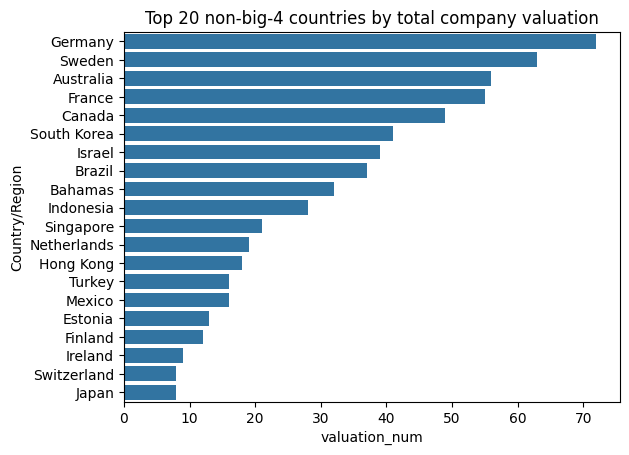

In [22]:
# Create a barplot to compare the top 20 non-big-4 countries with highest company valuations
sns.barplot(data=national_valuations_no_big4.head(20),
            y='Country/Region',
            x='valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show();

In [23]:
# Plot the sum of valuations per country.
data = national_valuations_no_big4

px.scatter_geo(data, 
               locations='Country/Region', 
               size='valuation_num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)')


**Question: How is the valuation sum per country visualized in the plot?**
- Valuation sum per country is visualized by the size of circles around the map.

**Question: Does any region stand out as having a lot of activity?**
- Europe has a lot of unicorn companies in a concentrated area.

## Conclusion

**What are some key takeaways that you learned during this lab?**
* Missing data is a common problem for data professionals anytime they work with a data sample.
* Addressing missing values is a part of the data-cleaning process and an important step in EDA. 
* Address missing values by either removing them or filling them in.
* When considering how to address missing values, keep in mind the business, the data, and the questions to be answered. Always ensure you are not introducing bias into the dataset. 
* Addressing the missing values enabled you to answer your investor's questions. 

**How would you present your findings from this lab to others? Consider the information you would provide (and what you would omit), how you would share the various data insights, and how data visualizations could help your presentation.**
* For the industry specific companies in certain locations, you could provide a short list of company names and locations.
* For the top 20 countries by sum of valuations, you could use the plot you created in this lab or share a list. 
- For the top 20 countries sorted by sum of company valuations in each country, you would exclude `United States`, `China`, `India`, and `United Kingdom`. 
* For the questions concerning the valuation map, in addition to your visuals, you would provide a short summary of the data points. This is because the investor did not request a further breakdown of this data. 
